<a href="https://colab.research.google.com/github/rithwik-kp/regressioncsv/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded =  files.upload()

Saving Iris.csv to Iris.csv


In [3]:
import  pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns

import warnings

warnings.filterwarnings ('ignore')


In [4]:
df = pd.read_csv('Iris.csv')

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df = df.drop(columns = ['Id'])

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
df.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


<Axes: >

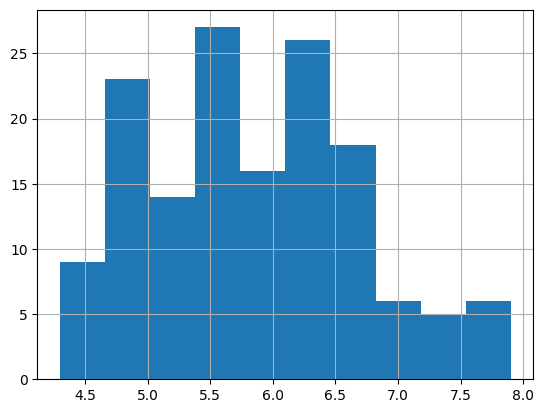

In [11]:
df['SepalLengthCm'].hist()

<Axes: >

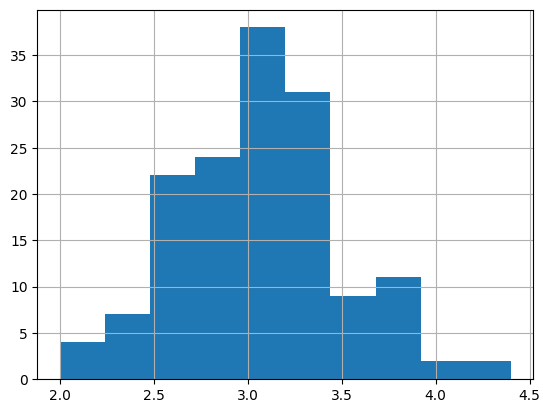

In [12]:
df['SepalWidthCm'].hist()

<Axes: >

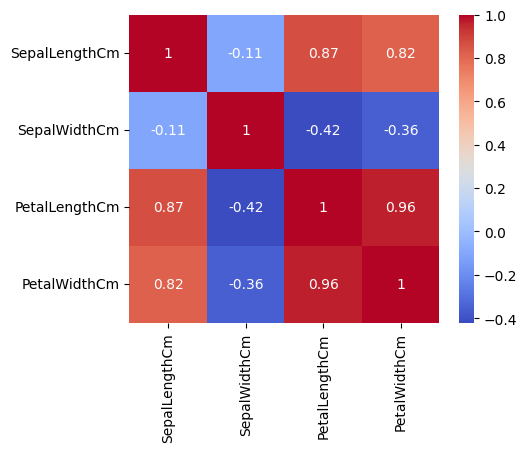

In [13]:
corr = df.drop('Species',axis=1).corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [14]:
px.scatter(df, x='Species', y='PetalWidthCm')

In [15]:
px.line(df, x='Species', y='PetalWidthCm')

In [16]:
px.scatter(df, x='Species', y='PetalLengthCm')

In [17]:
px.scatter(df, x='Species', y='PetalLengthCm')

In [18]:
px.scatter(df, x='Species', y='SepalWidthCm')

In [19]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

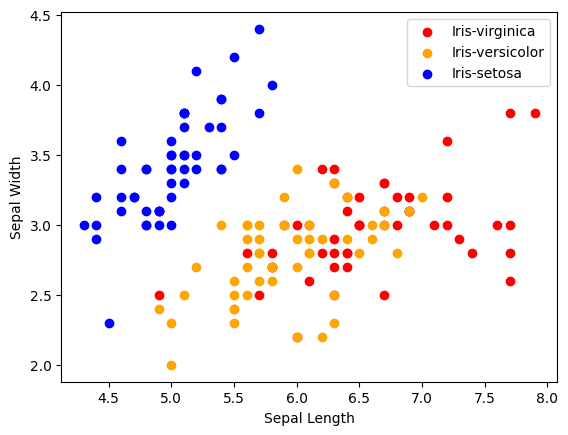

In [20]:
for i in range(3):
 x = df[df['Species'] == species[i]]
 plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
model = DecisionTreeClassifier()

In [29]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [31]:
data = 8,3.755,7,2.1

In [32]:
data_array = np.array([data])
data_array

array([[8.   , 3.755, 7.   , 2.1  ]])

In [33]:
predic = model.predict(data_array)

In [34]:
predic

array([2])

In [35]:
catagory = ['Iris-Satosa','Iris-Versicolor','Iris-Virginica']

In [36]:
print(catagory[int(predic[0])])

Iris-Virginica


In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        18
           2       0.88      0.88      0.88         8

    accuracy                           0.96        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.96      0.96      0.96        45

142    2
68     1
12     0
106    2
62     1
23     0
14     0
92     1
103    2
26     0
130    2
5      0
59     1
41     0
34     0
77     1
8      0
64     1
32     0
37     0
124    2
149    2
38     0
24     0
93     1
63     1
57     1
78     1
48     0
67     1
18     0
146    2
4      0
47     0
51     1
55     1
43     0
97     1
147    2
74     1
0      0
91     1
81     1
13     0
50     1
Name: Species, dtype: int64 [2 1 0 1 1 0 0 1 2 0 2 0 1 0 0 2 0 1 0 0 2 2 0 0 1 1 1 1 0 1 0 2 0 0 1 1 0
 1 2 1 0 1 1 0 1]
